In [14]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam and ham.csv').rename(columns={'sms':'text'})

In [3]:
df.head()

,text,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
# Clean and preprocess the text data
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and convert to lowercase
    words = word_tokenize(text)  # Tokenize the text
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [6]:
df.head()

,text,label,cleaned_text
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...\n,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goes usf lives around though


In [8]:
#Feature engineering
from sklearn.feature_extraction.text import CountVectorizer

# Convert text data into a bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Target labels
y = df['label']

In [9]:
#Model selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

MultinomialNB()

In [10]:
#Training and visulization
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       954
           1       0.88      0.93      0.91       161

    accuracy                           0.97      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.97      0.97      0.97      1115



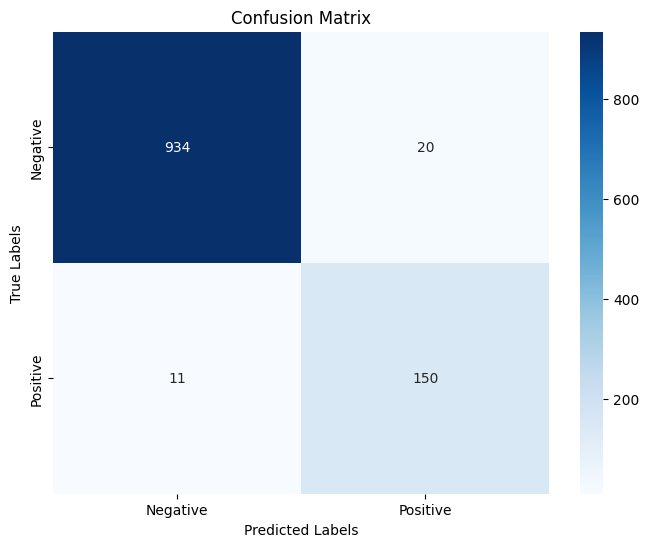

Accuracy: 0.9721973094170404
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       954
           1       0.88      0.93      0.91       161

    accuracy                           0.97      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.97      0.97      0.97      1115



In [15]:
#  Visualizing Results
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)